# MNIST Point Cloud Generation

This notebook generates point clouds from the MNIST dataset and writes them to numpy files.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import tensorflow.keras as keras

## Point Cloud Generation

The following function quickly yields point clouds by making use of `numpy` efficiently.

In [2]:
def generate_mnist_pointclouds(dataset, num_points=100, threshold=50):
    # Create a 1-dimensional array of pixels across all images
    img_ids, y_pixels, x_pixels = np.nonzero(dataset > threshold)
    pixels = np.column_stack((x_pixels, 28 - y_pixels))
    
    # Determine the starting pixel index of each image
    img_ids, pixel_counts = np.unique(img_ids, return_counts=True)
    pixel_index_offsets = np.roll(np.cumsum(pixel_counts), 1)
    pixel_index_offsets[0] = 0
    
    # Generate random pixel indices for each image. (len_dataset, num_points)
    random_pixel_indices = np.random.uniform(size=(num_points, dataset.shape[0]))
    pixel_indices = np.floor(pixel_counts[img_ids]*random_pixel_indices).astype(dtype=int).T
    pixel_indices += pixel_index_offsets.reshape(-1, 1)
    
    # Generate the point clouds
    points = pixels[pixel_indices].astype(float)
    points += np.random.uniform(size=points.shape)
    
    return points

---
## Load the Dataset

In [3]:
(x_train_img, y_train_img), (x_test_img, y_test_img) = keras.datasets.mnist.load_data()

In [4]:
x_train_img.shape, y_train_img.shape

((60000, 28, 28), (60000,))

In [5]:
x_test_img.shape, y_test_img.shape

((10000, 28, 28), (10000,))

---
## Config and Preview

In [6]:
# Config
num_points = 1000
threshold = 50

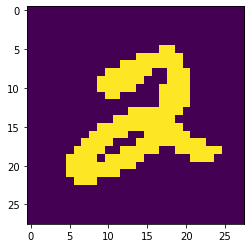

In [7]:
plt.imshow(x_train_img[5] > threshold)
plt.show()

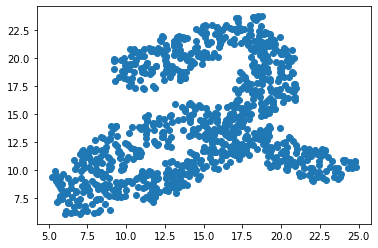

In [8]:
mnist_index = 5
points = generate_mnist_pointclouds(x_train_img[mnist_index:mnist_index+1], num_points, threshold)
plt.scatter(*points.T)

---
## Dataset Generation

In [19]:
output_path = "./"

In [20]:
x_train = generate_mnist_pointclouds(x_train_img, num_points, threshold)

In [21]:
x_test = generate_mnist_pointclouds(x_test_img, num_points, threshold)

In [22]:
np.savez(join(output_path, f"mnist_point_cloud_train_{num_points}"), x_train)
np.savez(join(output_path, f"mnist_point_cloud_test_{num_points}"), x_test)